<a href="https://colab.research.google.com/github/jmpadukone/fall_junior_paper/blob/main/JP_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --quiet datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cud

In [ ]:
!pip install pyarrow_hotfix

In [ ]:
!pip install scikit-learn==1.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.34.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.1.3 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
#Code below provided to me by Liam Parker; not written by me

# Standard library imports
import os
from typing import Tuple

# Third-party imports
from astropy.table import Table
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Custom module imports
import pyarrow as pa
import pyarrow_hotfix

# Setting up pyarrow and hotfix
pa.PyExtensionType.set_auto_load(True)
pyarrow_hotfix.uninstall()


DOWNLOAD_DIR = "https://users.flatironinstitute.org/~lparker/astroclip_demo/"


def get_data(
        download_dir: str = DOWNLOAD_DIR,
        train_name: str = "train_provabgs.hdf5",
        test_name: str = "test_provabgs.hdf5"
    ) -> tuple:

    # Set up paths
    train_path = os.path.join(download_dir, train_name)
    test_path = os.path.join(download_dir, test_name)

    # Get the data
    train_provabgs, test_provabgs = Table.read(train_path), Table.read(test_path)

    return train_provabgs, test_provabgs

# Get the data
train_provabgs, test_provabgs = get_data()

train_provabgs.columns

embedding_type = "astroclip_image"    # image or spectrum
gal_property = "Z_HP"  # Z_HP, Z_MW, LOG_MSTAR, TAGE_MW, AVG_SFR

# Get the embeddings
X_train, X_test = train_provabgs[f"{embedding_type}_embeddings"], test_provabgs[f"{embedding_type}_embeddings"]
y_train, y_test = train_provabgs[gal_property], test_provabgs[gal_property]

print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))

Number of training samples: 84103
Number of testing samples: 21051


# Data Exploration and Visualization

In [ ]:
# Code starting below written by me

# Importing standard packages required for plots
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd

# Getting galaxy properties from PROVABGS and printing max and min values
z = np.array(train_provabgs['Z_HP'])
mag_g = np.array(train_provabgs['MAG_G'])
mag_r = np.array(train_provabgs['MAG_R'])
mag_z = np.array(train_provabgs['MAG_Z'])
logmstar = np.array(train_provabgs['LOG_MSTAR'])

zmax = np.max(z)
zmin = np.min(z)
print(f'Maximum redshift value = {zmax}')
print(f'Minimum redshift value = {zmin}')

mgmax = np.max(mag_g)
mgmin = np.min(mag_g)
print(f'Maximum MAG_G value = {mgmax}')
print(f'Minimum MAG_G value = {mgmin}')

mrmax = np.max(mag_r)
mrmin = np.min(mag_r)
print(f'Maximum MAG_R value = {mrmax}')
print(f'Minimum MAG_R value = {mrmin}')

mzmax = np.max(mag_z)
mzmin = np.min(mag_z)
print(f'Maximum MAG_Z value = {mzmax}')
print(f'Minimum MAG_Z value = {mzmin}')

Maximum redshift value = 0.5997362739291541
Minimum redshift value = 1.4423111463306655e-05
Maximum MAG_G value = 22.344277170967494
Minimum MAG_G value = 13.028928877645122
Maximum MAG_R value = 20.29986135418326
Minimum MAG_R value = 12.181516204849817
Maximum MAG_Z value = 19.98795386969569
Minimum MAG_Z value = 11.62103641631382


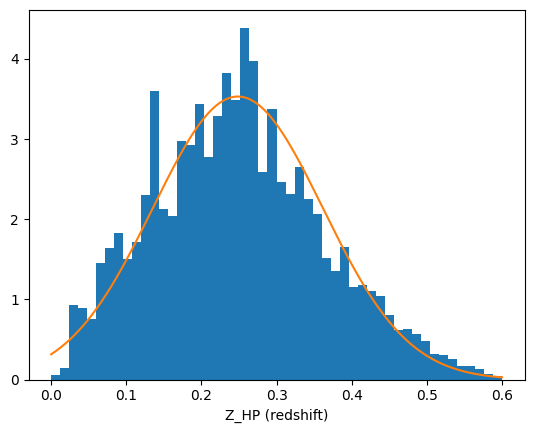

In [ ]:
# Plotting the normalized distribution of the photometric redshift
plt.hist(z, bins=50, density=True)

mean, std = norm.fit(z)
x = np.linspace(0, 0.6, 1000)

plt.plot(x,norm.pdf(x, mean, std))
plt.xlabel('Z_HP (redshift)')
plt.show()

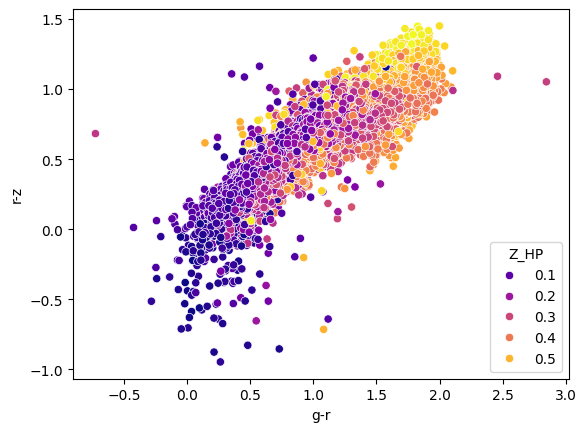

In [ ]:
# Plotting a color-color plot of the photometric data, colored by redshift
rz = mag_r - mag_z
gr = mag_g - mag_r
data = {'G-R': gr, 'R-Z':rz, 'Z_HP': z}
df = pd.DataFrame(data)
scatter = sns.scatterplot(df, x=df['G-R'], y=df['R-Z'], hue=df['Z_HP'], palette='plasma')
plt.xlabel('g-r')
plt.ylabel('r-z')
plt.show()

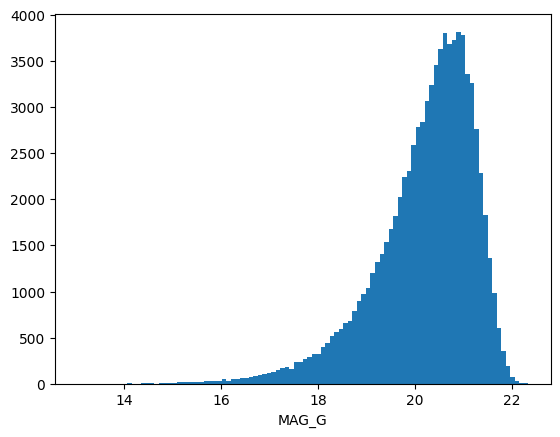

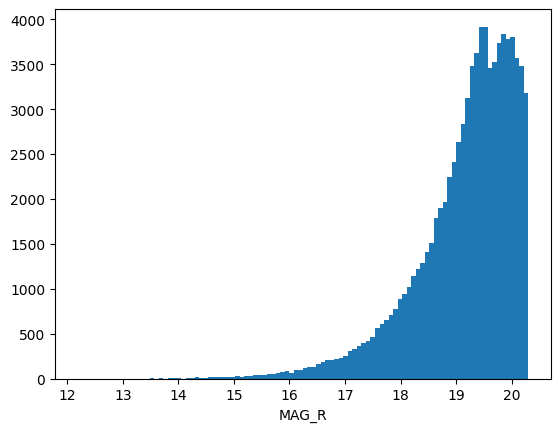

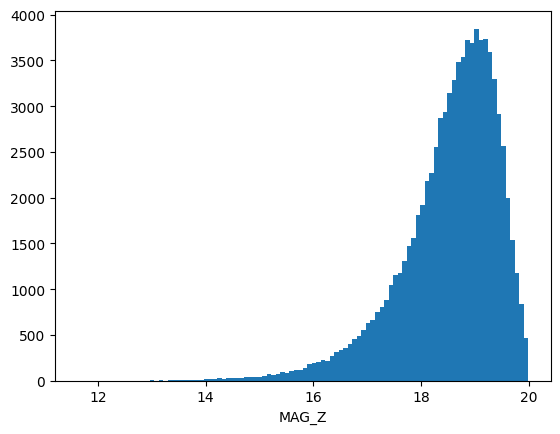

In [ ]:
# Plotting the distributions of photometric data in individual magnitude bands
plt.hist(mag_g, bins=100)
plt.xlabel("MAG_G")
plt.show()

plt.hist(mag_r, bins=100)
plt.xlabel("MAG_R")
plt.show()

plt.hist(mag_z, bins=100)
plt.xlabel("MAG_Z")
plt.show()

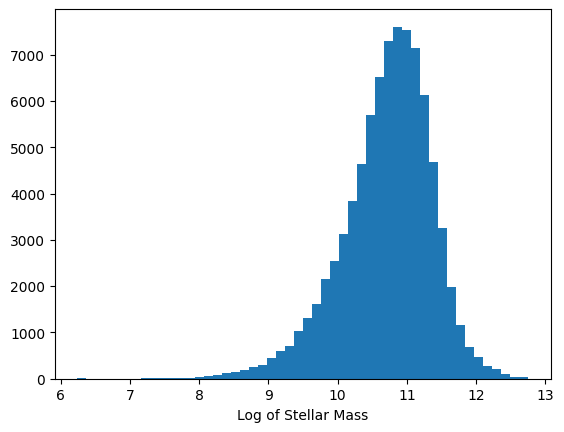

In [ ]:
# Plotting the distribution of log of stellar mass from PROVABGS
plt.hist(logmstar, bins=50)
plt.xlabel('Log of Stellar Mass')
plt.show()

# Using sklearn to Implement KNN Regressors

0.7520492129562232


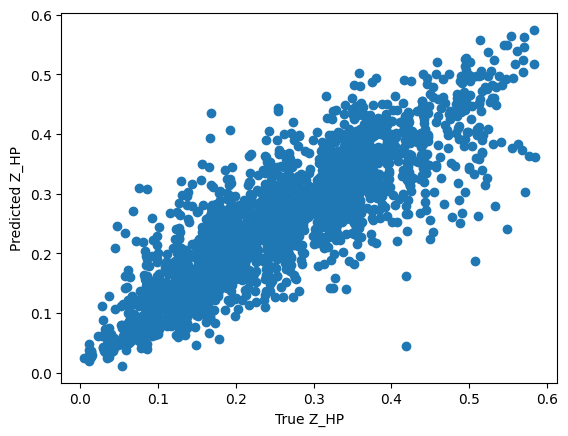

0.6733857576451645


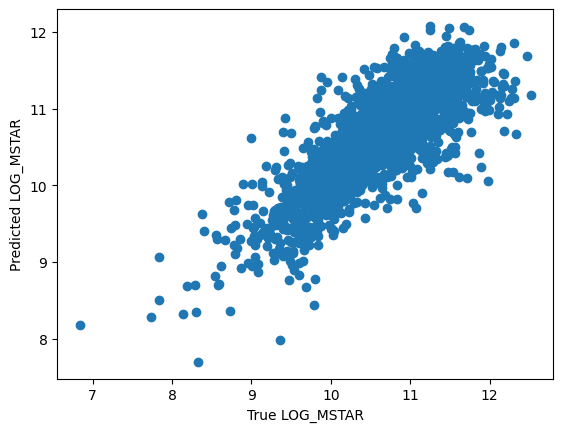

In [ ]:
# Implementing a KNN Regressor to determine the accuracy of AstroCLIP image embeddings for predicting galaxy properties
from sklearn.neighbors import KNeighborsRegressor
y1_train, y1_test = train_provabgs['Z_HP'], test_provabgs['Z_HP']
y2_train, y2_test = train_provabgs['LOG_MSTAR'], test_provabgs['LOG_MSTAR']

# Implementing and plotting R2 score for photometric redshift
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y1_train)
X_res = neigh.kneighbors(X_test, return_distance=False)
X1_pred = neigh.predict(X_test)
X1_score = neigh.score(X_test, y1_test)
print(X1_score)
plt.scatter(y1_test[:3000], X1_pred[:3000])
plt.ylabel('Predicted Z_HP')
plt.xlabel('True Z_HP')
plt.show()

# Implementing and plotting R2 score for log of stellar mass
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y2_train)
X_res = neigh.kneighbors(X_test, return_distance=False)
X2_pred = neigh.predict(X_test)
X2_score = neigh.score(X_test, y2_test)
print(X2_score)
plt.scatter(y2_test[:3000], X2_pred[:3000])
plt.ylabel('Predicted LOG_MSTAR')
plt.xlabel('True LOG_MSTAR')
plt.show()

# Using quicksom to Implement Self-Organizing Maps to Compare Image Embeddings vs. Photometry

In [ ]:
!pip install quicksom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.5 MB/s eta 0:00:00


In [ ]:
# Importing relevant packages for SOMs
import pickle
import numpy as np
import matplotlib.pyplot as plt
from quicksom.som import SOM
from sklearn.cluster import AgglomerativeClustering

In [ ]:
redshift = train_provabgs['Z_HP'][:10000]

In [24]:
# Getting a shuffled array to train the SOMs on random samples of the image embeddings and photometry

X = train_provabgs["astroclip_image_embeddings"]
X2 = X + 0
np.random.shuffle(X2)

mag_g = np.array(train_provabgs['MAG_G'])
mag_r = np.array(train_provabgs['MAG_R'])
mag_z = np.array(train_provabgs['MAG_Z'])

data = np.transpose(np.vstack([mag_g, mag_r, mag_z]))
data = np.array(data, dtype=np.float32)

data2 = data + 0
np.random.shuffle(data2)


In [ ]:
# Example of the code used to train and save the two SOMs as som1.p and som2.p used below
{
# from quicksom.som import SOM

# # Create SOM object and train it, then dump it as a pickle object
# m, n = 64, 64
# dim = X.shape[1]
# n_epoch = 5
# batch_size = 64
# som = SOM(m, n, dim, n_epoch=n_epoch)
# learning_error = som.fit(X2[:1024], batch_size=batch_size, alpha=10)
# som.save_pickle('som.p')
}

{}

## Image Embedding SOM

In [ ]:
# Getting the U-matrix and predicted cells for the first 10000 image embeddings
with open("/content/drive/My Drive/JP/som1.p", 'rb') as f:
    som1 = pickle.load(f)

umat1 = som1.umat
predicted_cells = som1.predict(X[:10000])

0/100 | time: 0:00:00.733082 


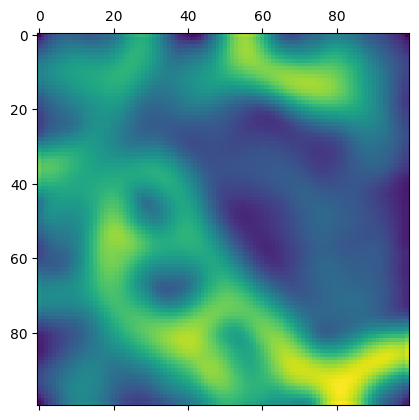

In [21]:
# Visualizing U-matrix
plt.matshow(som1.umat)
plt.show()

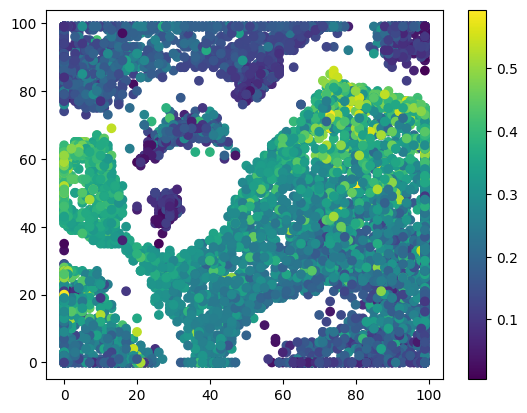

In [22]:
# Visualizing the cell assignments
plt.scatter(predicted_cells[0][:,1], predicted_cells[0][:,0], c=redshift)
plt.colorbar()
plt.show()

## Photometry SOM

In [25]:
# Getting the U-matrix and predicted cells for the first 10000 image embeddings
with open("/content/drive/My Drive/JP/som2.p", 'rb') as f:
    som2 = pickle.load(f)

umat2 = som2.umat
predicted_cells2 = som2.predict(data[:10000])

0/100 | time: 0:00:00.221896 


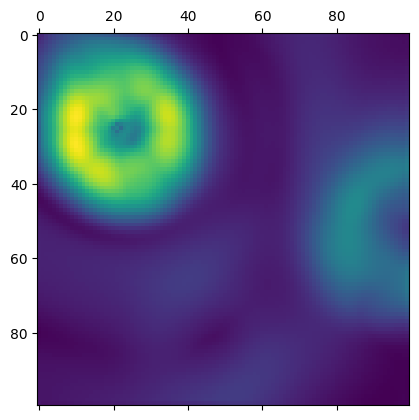

In [26]:
# Visualizing U-matrix
plt.matshow(umat2)
plt.show()

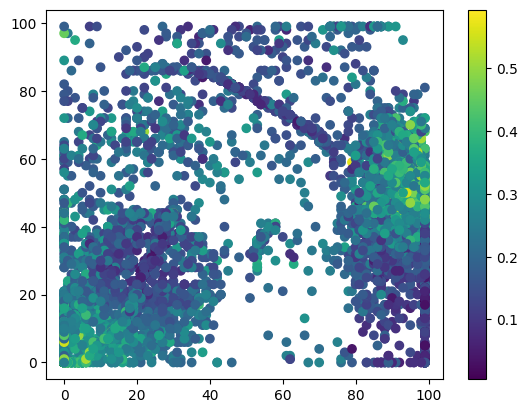

In [27]:
# Visualizing the cell assignments
plt.scatter(predicted_cells2[0][:,1], predicted_cells2[0][:,0], c=redshift)
plt.colorbar()
plt.show()

## Std Dev Maps

### Image Embedding SOM

In [28]:
n = len(predicted_cells[0])
cells1 = np.zeros((100,100,n))
ind = np.zeros((100,100))

In [29]:
# Assigning the predicted redshifts for each cell according to the image embedding SOM
for i in range(n):
  x = predicted_cells[0][i][0]
  y = predicted_cells[0][i][1]
  index = int(ind[x][y])
  cells1[x][y][index] = redshift[i]
  ind[x][y] += 1

In [30]:
std_map1 = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    std_map1[i][j] = np.std(cells1[i][j])

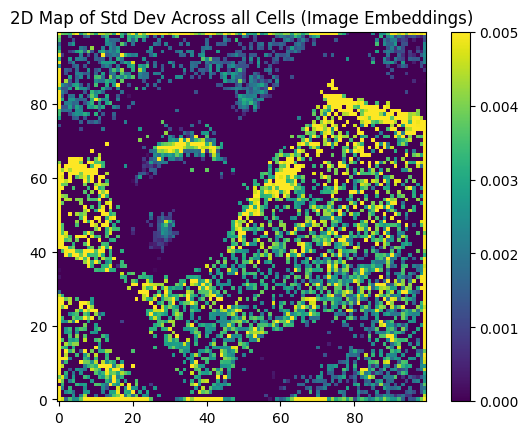

In [31]:
im = plt.imshow(std_map1, vmax = 0.005, origin='lower') #Setting vmax lower so map is visible
plt.colorbar(im)
plt.title('2D Map of Std Dev Across all Cells (Image Embeddings)')
plt.show()

### Photometry SOM

In [32]:
n = len(predicted_cells2[0])
cells2 = np.empty((100,100,n))
ind = np.zeros((100,100))

In [33]:
# Assigning the predicted redshifts for each cell according to the photometry SOM
for i in range(n):
  x = predicted_cells2[0][i][0]
  y = predicted_cells2[0][i][1]
  index = int(ind[x][y])
  cells2[x][y][index] = redshift[i]
  ind[x][y] += 1

In [34]:
std_map2 = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    std_map2[i][j] = np.std(cells2[i][j])

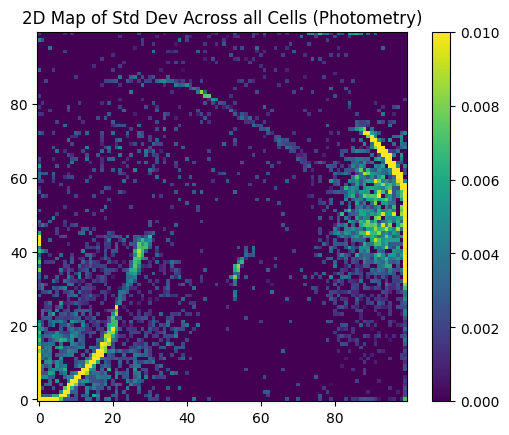

In [35]:
im = plt.imshow(std_map2, vmax = 0.01, origin='lower') #Setting vmax lower so map is visible
plt.colorbar(im)
plt.title('2D Map of Std Dev Across all Cells (Photometry)')
plt.show()

### Std Dev Across All Cells - Comparison

In [36]:
# Calculating std. dev. of redshifts for each cell in image embedding SOM with more than one object
std1 = []
for i in range(100):
  for j in range(100):
    if np.count_nonzero(cells1[i][j]) > 1:
      std = np.std(cells1[i][j])
      std1.append(std)

In [37]:
# Calculating std. dev. of redshifts for each cell in photometry SOM with more than one object
std2 = []
for i in range(100):
  for j in range(100):
    if np.count_nonzero(cells2[i][j]) > 1:
      std2.append(np.std(cells2[i][j]))

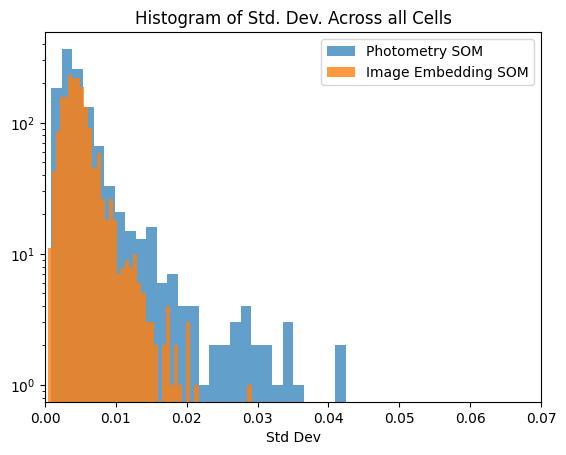

In [38]:
plt.hist(std2, bins=50, alpha=0.7, label='Photometry SOM')
plt.hist(std1,bins=50, alpha=0.8, label='Image Embedding SOM')
plt.yscale("log")
plt.title('Histogram of Std. Dev. Across all Cells')
plt.xlim(0,0.07)
plt.legend()
plt.xlabel('Std Dev')
plt.show()